In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_excel('/Users/buidatvan/Downloads/LongCousera/Pizzahut/Round 2 - Data set.xlsx', sheet_name='Purchasing data')

In [3]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1048570,Delivery,STORE,2023-01-09 00:00:00+00:00,178107,1398136,Unknown,No,Southern Provinces
1048571,1048571,1048571,Take Away,STORE,2023-01-09 00:00:00+00:00,331447,2023258,Unknown,No,Hanoi
1048572,1048572,1048572,Take Away,WEBSITE,2023-01-09 00:00:00+00:00,381509,2041510,Female,Yes,Southern Provinces
1048573,1048573,1048573,Take Away,STORE,2023-01-09 00:00:00+00:00,508205,1927215,Unknown,Yes,Hanoi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1048575 non-null  int64 
 1   BillID           1048575 non-null  int64 
 2   Channel          1048575 non-null  object
 3   OrderFrom        1048575 non-null  object
 4   TransactionDate  1048575 non-null  object
 5   SalesAmount      1048575 non-null  int64 
 6   CustomerID       1048575 non-null  int64 
 7   CustomerGender   1048575 non-null  object
 8   VoucherStatus    1048575 non-null  object
 9   Province         1048575 non-null  object
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


In [5]:
df.isnull().values.any()

False

In [6]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])

In [7]:
df['BillID'] = df['BillID'].astype('str')

In [8]:
df['CustomerID'] = df['CustomerID'].astype('str')

In [9]:
revenue=df[['TransactionDate', 'SalesAmount']].groupby('TransactionDate').sum().reset_index()

In [10]:
revenue.sort_values(by='TransactionDate')

,TransactionDate,SalesAmount
0,2021-10-01 00:00:00+00:00,393927189
1,2021-10-02 00:00:00+00:00,622958411
2,2021-10-03 00:00:00+00:00,695401533
3,2021-10-04 00:00:00+00:00,512412460
4,2021-10-05 00:00:00+00:00,508768854
...,...,...
461,2023-01-05 00:00:00+00:00,474889173
462,2023-01-06 00:00:00+00:00,651874420
463,2023-01-07 00:00:00+00:00,929308705
464,2023-01-08 00:00:00+00:00,956331763


In [11]:
revenue.describe()

,SalesAmount
count,4.660000e+02
mean,6.860116e+08
std,2.227411e+08
min,2.307962e+08
25%,5.126014e+08
50%,6.474437e+08
75%,8.521590e+08
max,1.679519e+09


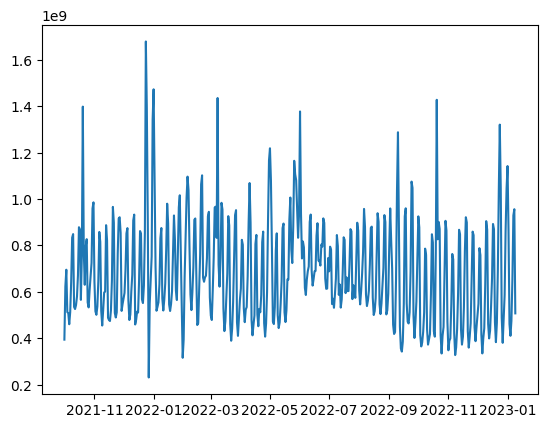

In [12]:
plt.plot(revenue['TransactionDate'],revenue['SalesAmount'])

In [13]:
customer = df[['CustomerID','SalesAmount']].groupby('CustomerID').sum().reset_index()

In [14]:
customer.describe()

,SalesAmount
count,5.836420e+05
mean,5.477354e+05
std,8.803920e+05
min,7.148000e+03
25%,2.012890e+05
50%,3.118160e+05
75%,5.674812e+05
max,1.337745e+08


<Axes: ylabel='SalesAmount'>

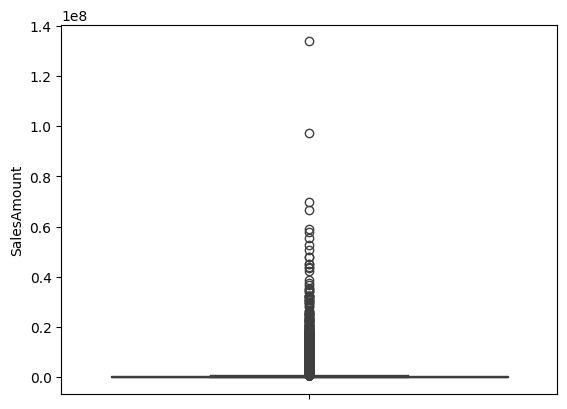

In [15]:
sns.boxplot(customer['SalesAmount'])

In [16]:
revenue_by_province = df.groupby('Province')['SalesAmount'].sum().reset_index()
revenue_by_province.columns = ['Province', 'TotalSalesAmount']

customer_by_province = df.groupby('Province')['CustomerID'].nunique().reset_index()
customer_by_province.columns = ['Province', 'TotalCustomers']

bar = go.Bar(x=customer_by_province['Province'], y=customer_by_province['TotalCustomers'], name='Total Customers', yaxis='y1')

line = go.Scatter(x=revenue_by_province['Province'], y=revenue_by_province['TotalSalesAmount'], name='Total Sales Amount', mode='lines+markers', yaxis='y2')

layout = go.Layout(
    title='Revenue Proportion and SumCustomer by Province',
    xaxis=dict(title='Province'),
    yaxis=dict(title='Total Customers', titlefont=dict(color='#1f77b4'), tickfont=dict(color='#1f77b4')),
    yaxis2=dict(title='Total Sales Amount', titlefont=dict(color='#ff7f0e'), tickfont=dict(color='#ff7f0e'), overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.1),
    width=700,  
    height=500
)
fig = go.Figure(data=[bar, line], layout=layout)
fig.show()

In [17]:
df['Channel'].value_counts()

Channel
Take Away    524150
Delivery     500918
Dine In       23507
Name: count, dtype: int64

In [18]:
data_pie_channel = df['Channel'].value_counts().reset_index(name='Channel_count')

In [19]:
data_pie_channel

,Channel,Channel_count
0,Take Away,524150
1,Delivery,500918
2,Dine In,23507


In [20]:
df['CustomerGender'].value_counts()

CustomerGender
Unknown    634040
Male       272150
Female     142385
Name: count, dtype: int64

In [21]:
data_pie_gender = df['CustomerGender'].value_counts().reset_index(name='gender_count')

In [22]:
fig = px.pie(data_pie_gender, values='gender_count', names='CustomerGender', title='Gender Distribution')
fig.update_layout(
    width=400, 
    height=400,  
)
fig.show()

In [23]:
revenue_by_channel = df.groupby('Channel')['SalesAmount'].sum().reset_index()
fig = px.pie(revenue_by_channel, values='SalesAmount', names='Channel', 
             title='Revenue Proportion by Channel')
fig.update_layout(
    width=400, 
    height=400,  
)
fig.show()

In [24]:
order_counts = df.groupby(['Channel', 'OrderFrom']).size().reset_index(name='Count')

fig = px.bar(order_counts, x='OrderFrom', y='Count', color='Channel', barmode='group',
             title='Number of Orders by Channel and OrderFrom',
             labels={'OrderFrom': 'Order From', 'Count': 'Number of Orders', 'Channel': 'Channel'})

fig.update_layout(
    width=700, 
    height=400,  
)
fig.show()

In [25]:
repeat_customers = df.groupby('CustomerID').filter(lambda x: len(x) >= 2)
repeat_customers_count = repeat_customers['CustomerID'].nunique()
total_customers = df['CustomerID'].nunique()
repeat_customer_rate = repeat_customers_count / total_customers


In [26]:
fig = px.bar(x=['Repeat Customers (>=2 times)', 'Non-Repeat Customers'], y=[repeat_customers_count, total_customers - repeat_customers_count],
             labels={'x': 'Customer Type', 'y': 'Number of Customers'},
             text=[f"{repeat_customers_count} ({repeat_customer_rate:.2f}%)",
                   f"{total_customers - repeat_customers_count} ({100-repeat_customer_rate:.2f}%)"],
            )
fig.update_layout(
    width=800,  
    height=400,
    title="Rate of customers returning a second time"
)
fig.show()

In [27]:
df['TransactionDate'].min(),df['TransactionDate'].max()

(Timestamp('2021-10-01 00:00:00+0000', tz='UTC'),
 Timestamp('2023-01-09 00:00:00+0000', tz='UTC'))

In [28]:
PRESENT = dt.datetime(2023,7,1)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']).dt.tz_localize(None)

In [29]:
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda date: (PRESENT - date.max()).days,
    'BillID': lambda num: len(num),
    'SalesAmount': lambda price: price.sum()
})

In [30]:
rfm.columns=['recency', 'frequency', 'monetary']

In [31]:
rfm['recency'] = rfm['recency'].astype(int)

In [32]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
0,554,1,411663
1,481,1,105503
10000,175,1,145127
1000000,601,1,190147
1000001,378,5,2416216


In [33]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])

In [34]:
rfm['f_rank'] = rfm['frequency'].rank(pct=True)

rfm['f_quartile'] = pd.cut(rfm['f_rank'], bins=4, labels=['1', '2', '3', '4'])

rfm.drop('f_rank', axis=1, inplace=True)

In [35]:
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])

In [36]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
0,554,1,411663,1,1,3
1,481,1,105503,2,1,1
10000,175,1,145127,4,1,1
1000000,601,1,190147,1,1,1
1000001,378,5,2416216,3,4,4
...,...,...,...,...,...,...
99998,482,1,159653,2,1,1
999984,542,1,176064,1,1,1
999985,365,1,415034,3,1,3


In [37]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
0,554,1,411663,1,1,3,113
1,481,1,105503,2,1,1,211
10000,175,1,145127,4,1,1,411
1000000,601,1,190147,1,1,1,111
1000001,378,5,2416216,3,4,4,344


In [38]:
rfm['RFM_Score'].unique()

array(['113', '211', '411', '111', '344', '413', '443', '112', '313',
       '244', '212', '412', '114', '312', '311', '132', '433', '233',
       '144', '444', '333', '133', '332', '134', '214', '334', '234',
       '314', '434', '213', '231', '232', '432', '414', '243', '242',
       '131', '343', '431', '331', '141', '442', '241', '143', '341',
       '441', '342', '142'], dtype=object)

In [39]:
rfm_counts = rfm['RFM_Score'].value_counts()
rfm_counts_df = rfm_counts.reset_index()
rfm_counts_df.columns = ['RFM_Score', 'Count']

fig = px.treemap(rfm_counts_df, path=['RFM_Score'], values='Count', title='RFM Treemap')
fig.update_layout(
    width=700,  
    height=500,  
)

fig.show()


In [40]:
rfm[['r_quartile', 'f_quartile', 'm_quartile']] = rfm[['r_quartile', 'f_quartile', 'm_quartile']].astype(int)

In [41]:
# Compute RFM score based on quartiles
rfm['RFM_Score_Sum'] = rfm['r_quartile'] + rfm['f_quartile'] + rfm['m_quartile']

# Create RFM segments based on the RFM score
rfm['RFM_Customer_Segment'] = ''

# Assign RFM segments based on the RFM score
rfm.loc[rfm['RFM_Score_Sum'] >= 10, 'RFM_Customer_Segment'] = 'Champions'
rfm.loc[(rfm['RFM_Score_Sum'] >= 7) & (rfm['RFM_Score_Sum'] < 10), 'RFM_Customer_Segment'] = 'Potential Loyalists'
rfm.loc[(rfm['RFM_Score_Sum'] >= 6) & (rfm['RFM_Score_Sum'] < 7), 'RFM_Customer_Segment'] = 'At Risk Customers'
rfm.loc[(rfm['RFM_Score_Sum'] >= 5) & (rfm['RFM_Score_Sum'] < 6), 'RFM_Customer_Segment'] = "Can't Lose"
rfm.loc[(rfm['RFM_Score_Sum'] >= 3) & (rfm['RFM_Score_Sum'] < 5), 'RFM_Customer_Segment'] = "Lost"

rfm.drop(columns=['RFM_Score_Sum'], inplace=True)

In [42]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Customer_Segment
CustomerID,,,,,,,,
0,554,1,411663,1,1,3,113,Can't Lose
1,481,1,105503,2,1,1,211,Lost
10000,175,1,145127,4,1,1,411,At Risk Customers
1000000,601,1,190147,1,1,1,111,Lost
1000001,378,5,2416216,3,4,4,344,Champions
...,...,...,...,...,...,...,...,...
99998,482,1,159653,2,1,1,211,Lost
999984,542,1,176064,1,1,1,111,Lost
999985,365,1,415034,3,1,3,313,Potential Loyalists


In [43]:
segment_counts = rfm['RFM_Customer_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Customer_Segment', 'Count']

fig_segment_dist = px.bar(segment_counts, x='RFM_Customer_Segment', y='Count', 
                          color='RFM_Customer_Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                          title='RFM Customer Segment Distribution')

fig_segment_dist.update_layout(
    width=800, 
    height=400,  
    showlegend=False
)

fig_segment_dist.show()

In [44]:
monetary_grouped = rfm.groupby('RFM_Customer_Segment')['monetary'].sum().reset_index()
fig = px.bar(monetary_grouped, x='RFM_Customer_Segment', y='monetary', 
             color='RFM_Customer_Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Sum Monetary Value by RFM Customer Segment')
fig.update_layout(
    width=800,  
    height=400,
    showlegend=False 
)
fig.show()